In [ ]:
import yfinance as yf

def fetch_stock_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    return data
stock_data = fetch_stock_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200


In [ ]:

print(stock_data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [ ]:
stock_data.drop_duplicates(inplace=True)

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def fetch_stock_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    return data

stock_data = fetch_stock_data()

# 1. Feature Engineering:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# b. Moving Averages (e.g., 20-day and 50-day):
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()

# c. Volatility (e.g., standard deviation of daily returns over a window):
stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=20).std()

# 2. Data Scaling:Min-Max Scaling (scales features to a range of 0 to 1):
scaler = MinMaxScaler()
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'MA_20', 'MA_50', 'Volatility']

# Fit and transform the selected features
stock_data[numerical_features] = scaler.fit_transform(stock_data[numerical_features])

# Display the preprocessed data (first few rows)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Daily_Return,MA_20,MA_50,Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-01-02,0.089415,0.084773,0.096577,0.080821,0.278335,NaN,NaN,NaN,NaN
2020-01-03,0.085954,0.084750,0.098118,0.081909,0.305221,0.478657,NaN,NaN,NaN
2020-01-06,0.088763,0.084015,0.093706,0.077893,0.235949,0.549857,NaN,NaN,NaN
2020-01-07,0.087092,0.085129,0.099272,0.085124,0.212354,0.498858,NaN,NaN,NaN
2020-01-08,0.092781,0.089322,0.098895,0.081921,0.269901,0.582534,NaN,NaN,NaN


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fetch stock data
def fetch_stock_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    return data

stock_data = fetch_stock_data()

# Prepare data for Linear Regression
X = stock_data[['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'MA_20', 'MA_50', 'Volatility']]
y = stock_data['Close']

# Handle NaN values by dropping rows with missing values
X.dropna(inplace=True)
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 1.3398215510015965e-05
R-squared: 0.9996010971870619


<ipython-input-2-41628c5a0d26>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


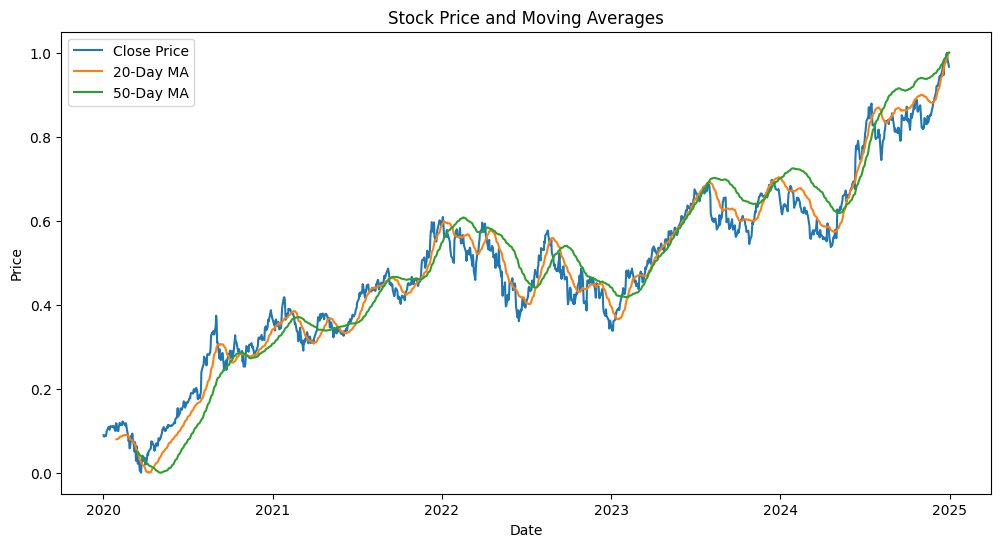

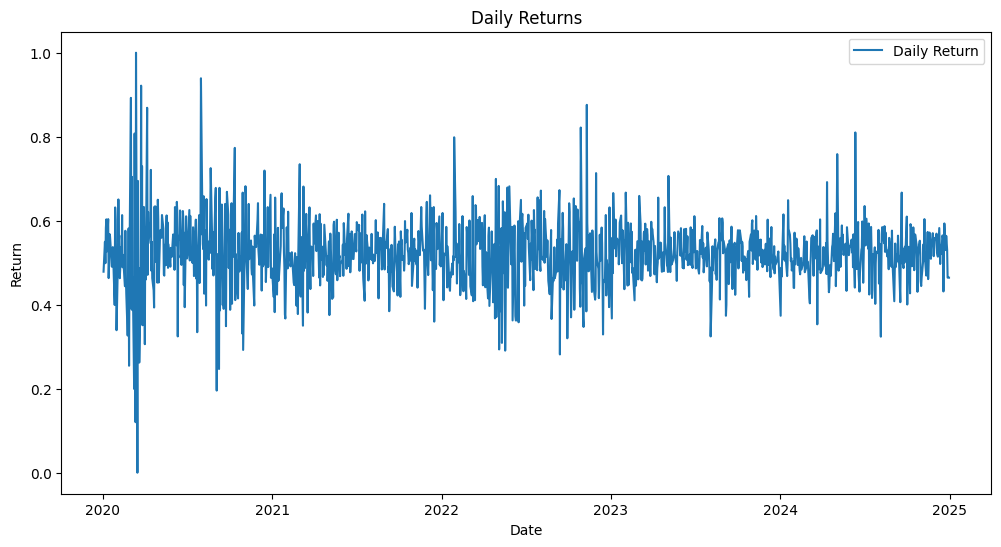

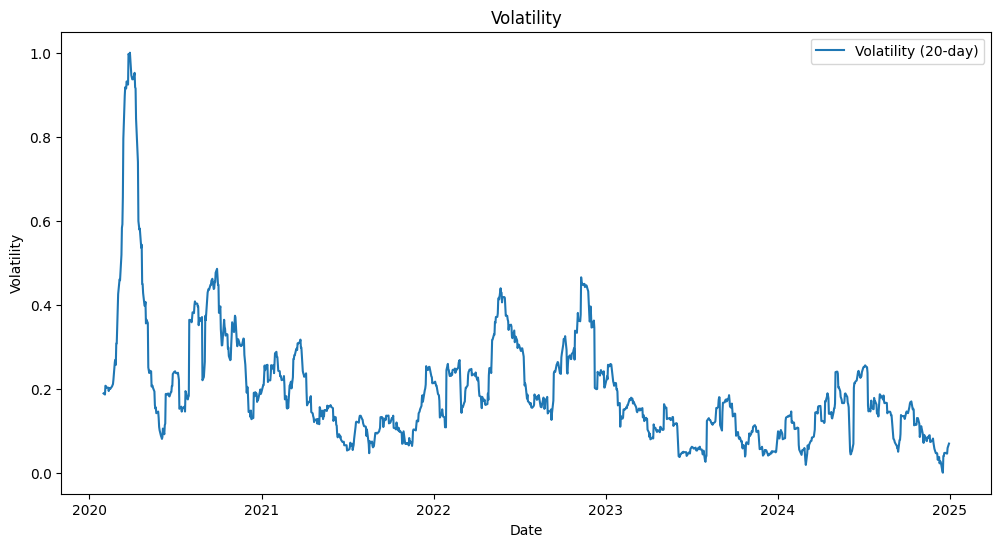

In [ ]:
# Module 2: Time Series Plots
import matplotlib.pyplot as plt

# 1. Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA_20'], label='20-Day MA')
plt.plot(stock_data['MA_50'], label='50-Day MA')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Daily_Return'], label='Daily Return')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# 3. Volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Volatility'], label='Volatility (20-day)')
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

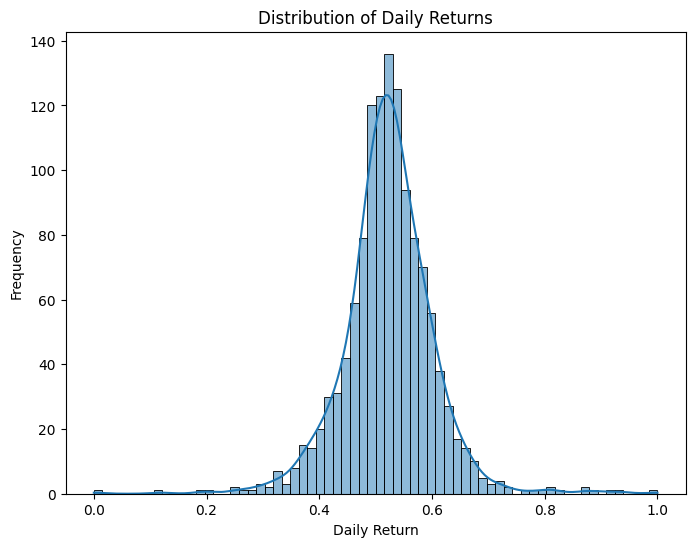

In [ ]:
# Module 3: Distributions and Relationships
import seaborn as sns

# 1. Distribution of Daily Returns
plt.figure(figsize=(8, 6))
sns.histplot(stock_data['Daily_Return'].values.ravel(), kde=True)  # Use .values.ravel() to flatten
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()




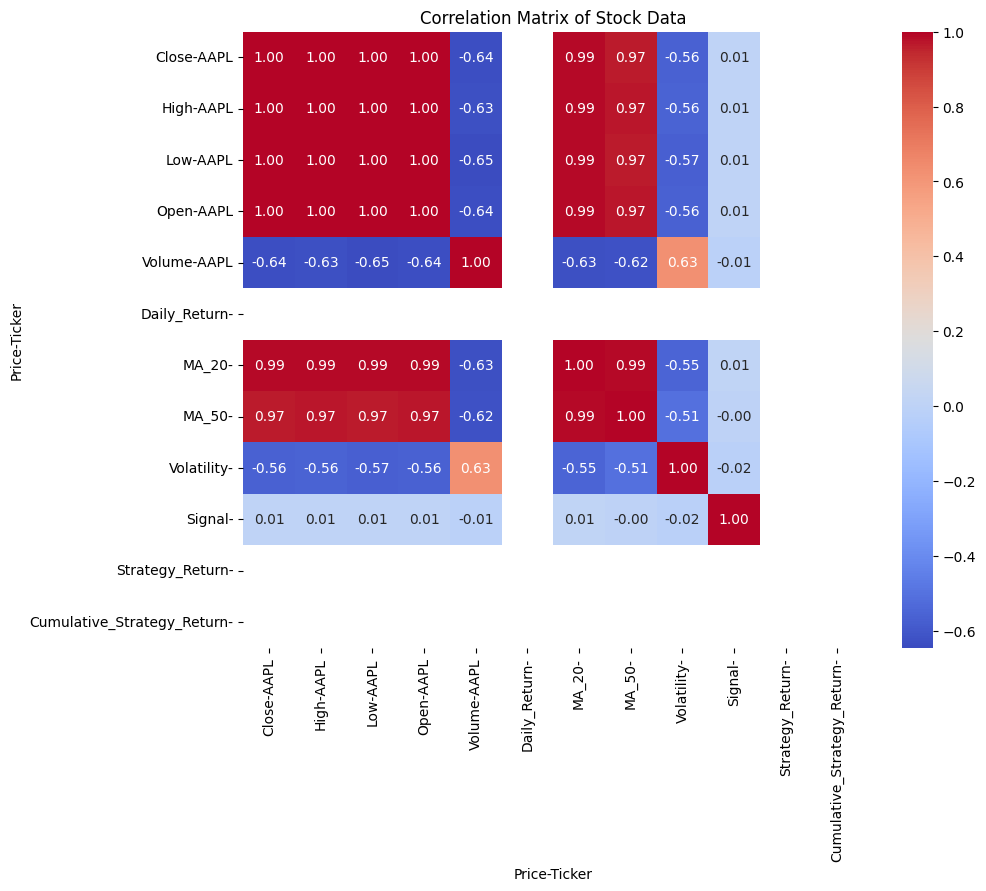

In [ ]:
# 2. Correlation Matrix Heatmap
correlation_matrix = stock_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Data')
plt.show()



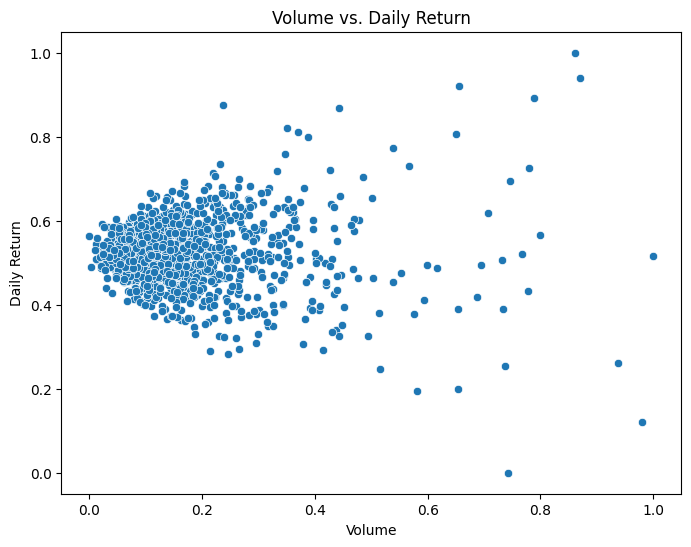

In [ ]:
# 3. Scatter Plots for Feature Relationships (example)
plt.figure(figsize=(8, 6))
# Access the columns as Series using single brackets and flatten the arrays:
sns.scatterplot(x=stock_data['Volume'].values.ravel(), y=stock_data['Daily_Return'].values.ravel())
plt.title('Volume vs. Daily Return')
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.show()


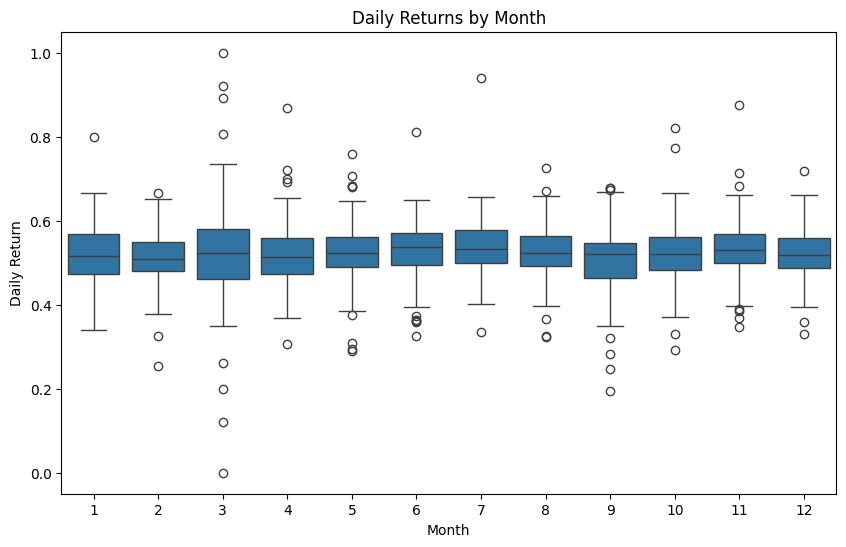

In [ ]:
# Module 4: Box Plots for Comparisons
# 1. Box Plot of Daily Returns by Month
stock_data['Month'] = stock_data.index.month  # Extract month from the index
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Daily_Return', data=stock_data)
plt.title('Daily Returns by Month')
plt.xlabel('Month')
plt.ylabel('Daily Return')
plt.show()

# You can create box plots for other comparisons as needed.

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Fetch Stock Data:
def fetch_stock_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    return data

stock_data = fetch_stock_data()

# 2. Feature Engineering:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=20).std()

# 3. Data Scaling:
# Scale features to a specific range to avoid issues caused by features with different scales.
# a. Min-Max Scaling (scales features to a range of 0 to 1):
scaler = MinMaxScaler()
# Select the numerical features to scale, ensure 'Adj Close' is present or removed
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'MA_20', 'MA_50', 'Volatility']
# If 'Adj Close' is present in stock_data.columns, include it in numerical_features

# Fit and transform the selected features
stock_data[numerical_features] = scaler.fit_transform(stock_data[numerical_features])

# 4. Prepare Data for Random Forest:
X = stock_data[['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'MA_20', 'MA_50', 'Volatility']]
y = stock_data['Close']

# Handle NaN values by dropping rows with missing values
X.dropna(inplace=True)
y = y.loc[X.index]

# 5. Split Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create and Train the Random Forest Model:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Make Predictions:
y_pred = rf_model.predict(X_test)

# 8. Evaluate the Model:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[*********************100%***********************]  1 of 1 completed
<ipython-input-6-cce67fc293bf>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 2.894469347133936e-05
R-squared: 0.9991382344494638


<ipython-input-7-22f3e7d41824>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


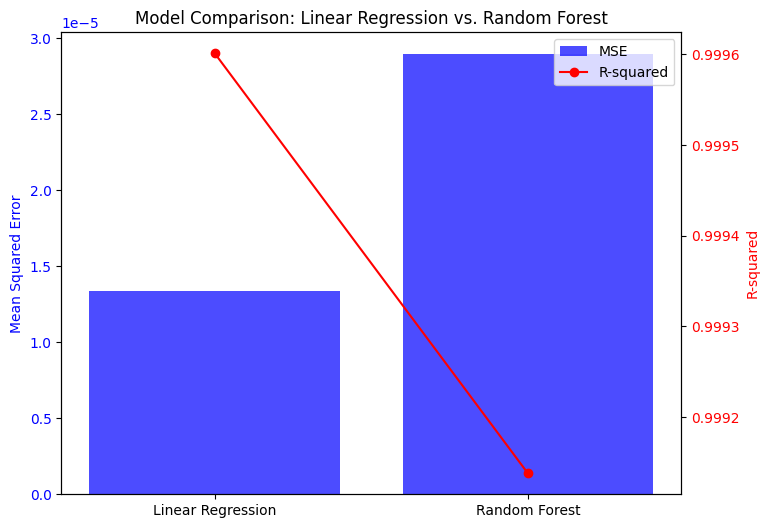

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch stock data (using your existing function)
# ...

# Feature Engineering and Data Scaling (using your existing code)
# ...

# Prepare data for both models
X = stock_data[['Open', 'High', 'Low', 'Volume', 'Daily_Return', 'MA_20', 'MA_50', 'Volatility']]
y = stock_data['Close']
X.dropna(inplace=True)
y = y.loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Comparison Plot
models = ['Linear Regression', 'Random Forest']
mse_scores = [lr_mse, rf_mse]
r2_scores = [lr_r2, rf_r2]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()  # Create a second y-axis

ax1.bar(models, mse_scores, color='blue', alpha=0.7, label='MSE')
ax2.plot(models, r2_scores, color='red', marker='o', label='R-squared')

ax1.set_ylabel('Mean Squared Error', color='blue')
ax2.set_ylabel('R-squared', color='red')
ax1.set_title('Model Comparison: Linear Regression vs. Random Forest')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

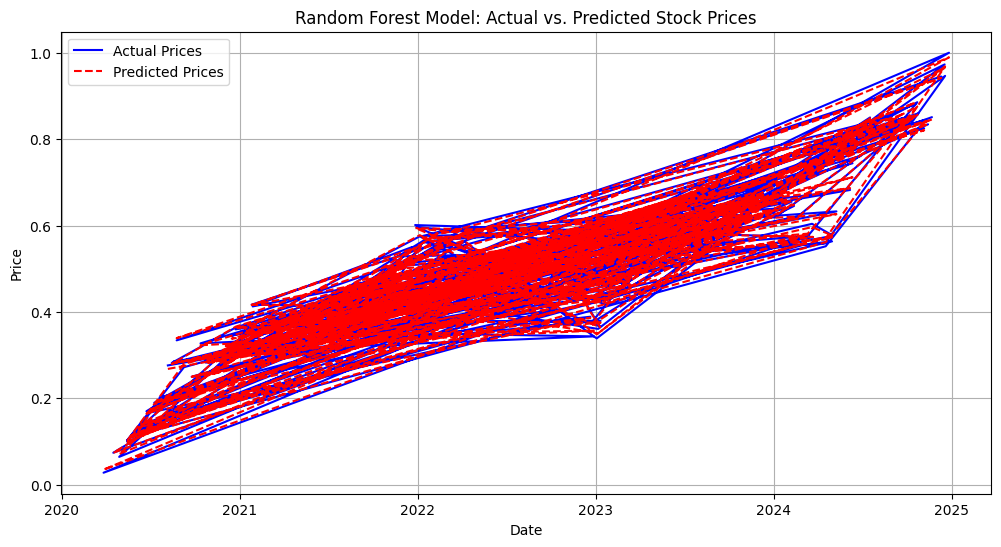

In [ ]:
import matplotlib.pyplot as plt


# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Create a plot to compare predictions with actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Random Forest Model: Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

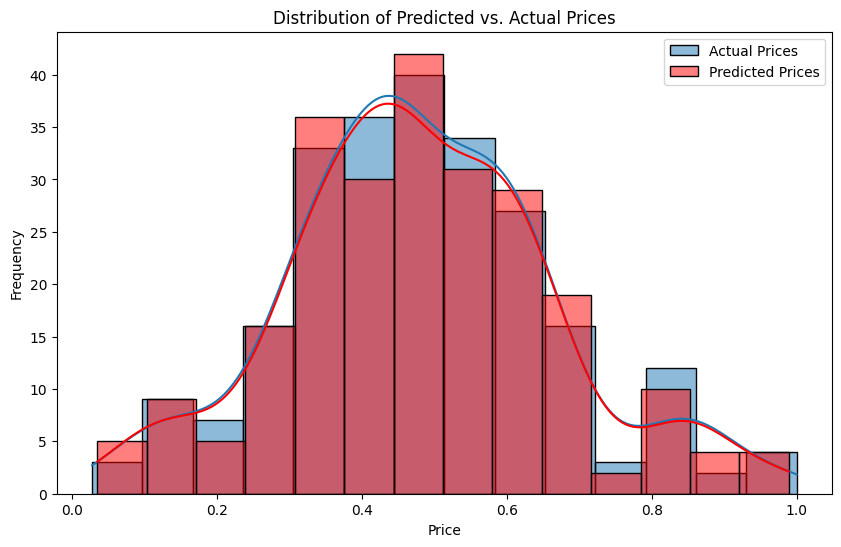

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual Prices', color='blue', kde=True)
sns.histplot(y_pred, label='Predicted Prices', color='red', kde=True)
plt.title('Distribution of Predicted vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')